<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-DIAmante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


Target: TIC 901674675
Querying Gaia DR2 catalog for ra,dec=(165.501 -25.6905) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(0.04,-27.30) mas/yr
Found 1 references in Vizier with `ruwe`.
Filename: /home/jp/.astropy/cache/download/py3/496a4c0a5f907d65ea2ab18d800e70eb
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1                1 BinTableHDU     72   1154R x 25C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 44A]   
None
Using DIAmante LC1 (rad=1) lightcurve.


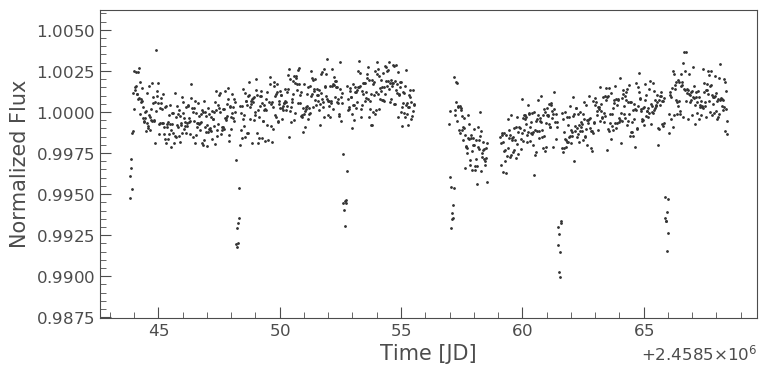

In [2]:
d = cr.Diamante(ticid=901674675, lc_num=1, aper_radius=1)
d.lc.scatter()

Using DIAmante LC1 (rad=1) lightcurve.
Using DIAmante LC1 (rad=2) lightcurve.


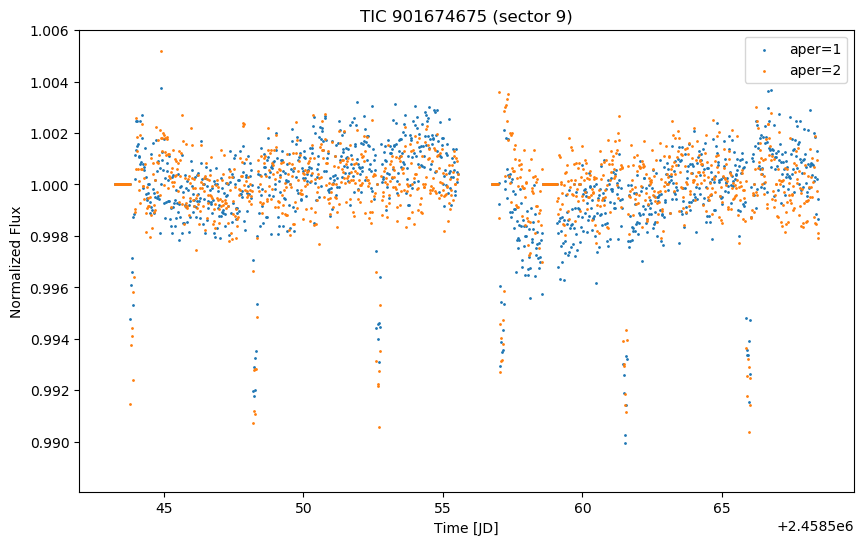

In [4]:
ax = d.plot_all_lcs()

Using period=4.4180 d, epoch=2458539.43 BTJD, duration=4.54 hr
Using biweight filter with window_length=13.61 day


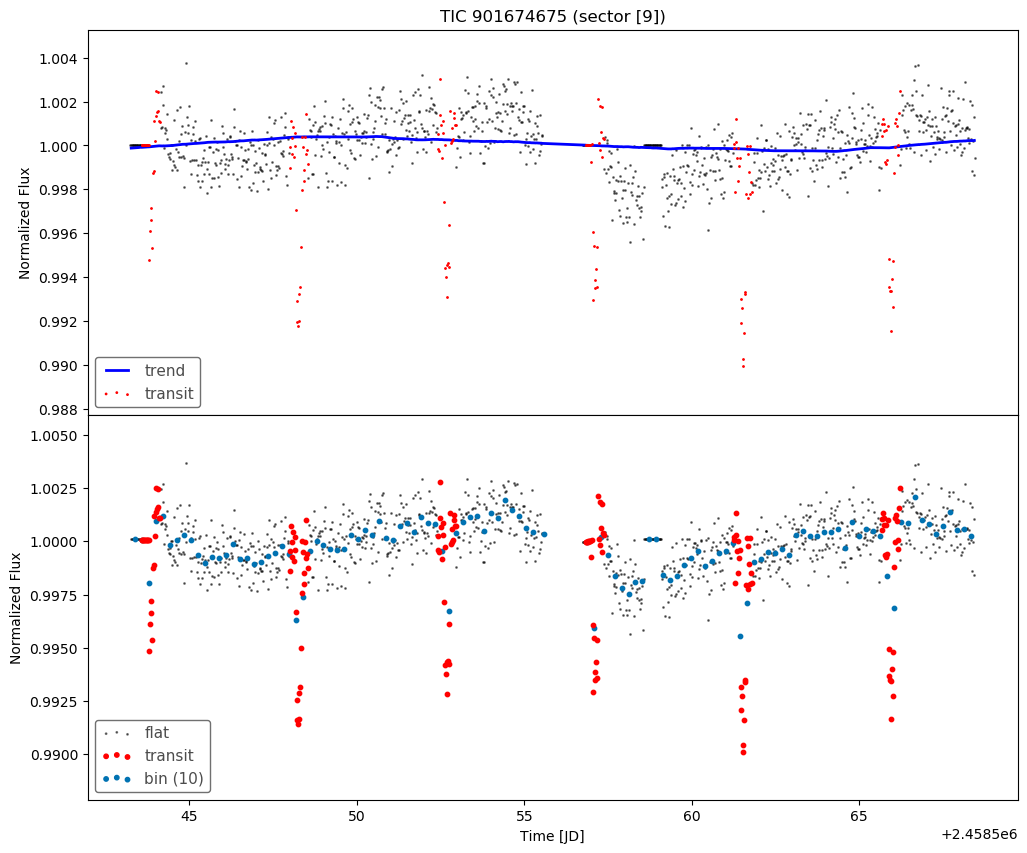

In [5]:
fig = d.plot_trend_flat_lcs()

Using biweight filter with window_length=0.57 day


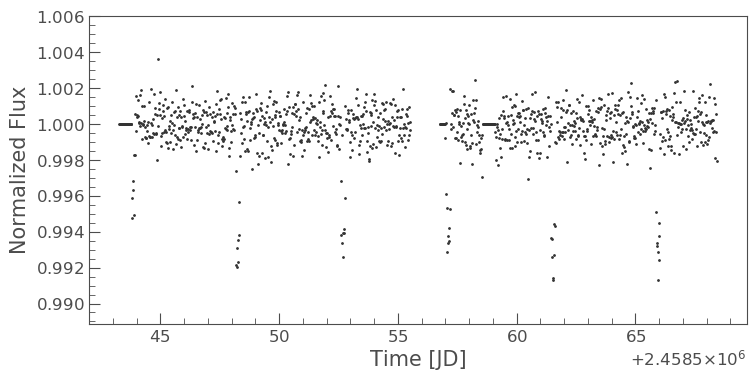

In [6]:
flat = d.get_flat_lc()
flat.scatter()

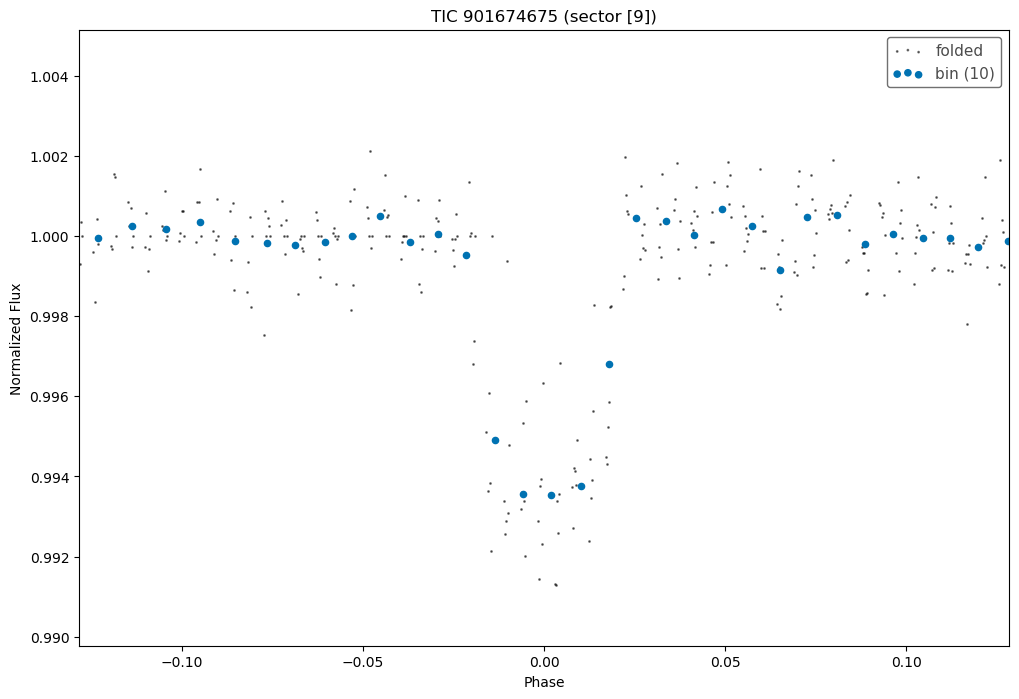

In [7]:
ax = d.plot_fold_lc(flat)

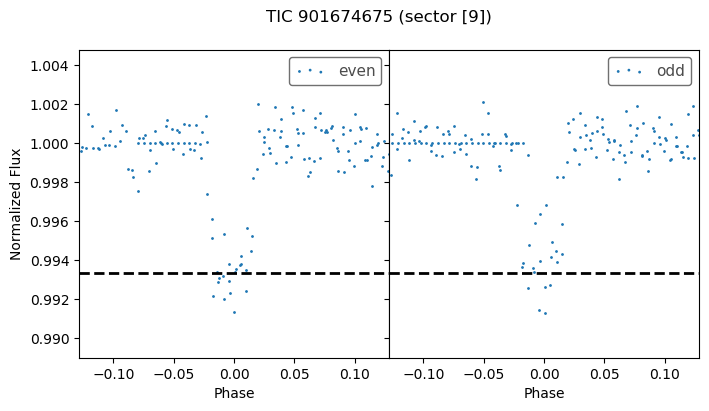

In [8]:
fig = d.plot_odd_even(flat)

## diamante candidates

In [9]:
df = d.diamante_catalog
df

,#ticID,gaiaID,ra,dec,p,pErr,t0Fit,t0FitErr,periodBLS,duration,...,sde,sdeAl,p2pio,p2ps,r,ntr,apnum,btier,bitmask,mult
0,282502866,3315129988421802624,90.086012,1.792205,0.132,0.034,1462.4236,0.0007,7.40066,0.088,...,4.396,2.500,23.619,1.824,1.405,2,2,5,0,1
1,281731203,3807826337147474176,163.032312,0.493167,0.053,0.006,1535.0390,0.0020,11.63954,0.222,...,3.453,1.982,1.569,1.024,0.930,2,2,3,0,1
2,422655579,2507901914613005056,29.263451,0.758825,0.067,0.002,1413.1342,0.0011,2.90580,0.229,...,4.258,2.367,0.915,1.002,1.383,4,2,4,0,1
3,452808876,3231856379348299008,72.660592,1.893836,0.079,0.004,1436.2571,0.0005,2.70628,0.218,...,6.581,3.631,0.639,0.993,1.661,10,2,3,0,1
4,328350926,3267099712746602240,46.931710,0.860922,0.102,0.015,1413.2984,0.0002,0.84898,0.063,...,10.719,6.354,1.434,1.041,0.994,20,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,292777663,6363988419853861504,275.093125,-79.350155,0.028,0.007,1622.4132,0.0046,4.60242,0.119,...,6.958,6.371,1.081,0.992,0.535,12,1,5,0,1
392,388198242,4626086498311592448,61.242969,-78.374681,0.043,0.004,1325.1885,0.0004,0.50549,0.037,...,41.110,25.444,1.082,1.002,0.416,221,1,5,0,1
393,260417932,5499671713762981248,95.940941,-54.578024,0.023,0.002,1318.3838,0.0029,7.98505,0.115,...,6.810,4.854,0.988,1.001,0.151,31,1,5,0,2
394,259377017,4781196115469953024,68.416080,-51.957394,0.055,0.007,1378.3015,0.0012,11.37912,0.092,...,3.864,2.407,1.541,0.990,0.208,6,1,4,0,2


In [10]:
df2 = d.new_diamante_candidates

check if any new diamante candidates is a cluster member

In [11]:
#note that Bouma has larger crossmatches while CastroGinard2019/20 yields None
cc = cr.ClusterCatalog(catalog_name="Bouma2019")
df_mem = cc.query_catalog(return_members=True)
df_mem.columns

Using Bouma2019 catalog.
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



Index(['source_id', 'clusters', 'reference', 'ext_catalog_name', 'ra', 'dec',
       'pmra', 'pmdec', 'parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'k13_name_match', 'Cluster', 'how_match',
       'not_in_k13', 'comment', 'k13_logt', 'k13_e_logt', 'distance'],
      dtype='object')

In [12]:
df_mem.source_id.isin(df2.gaiaID).sum()

1

In [13]:
df_mem[df_mem.source_id.isin(df2.gaiaID)]

,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
690668,4675516761525756288,NaN,Zari_2018_UMS,4675516761525756288,68.111858,-63.573468,-0.070939,6.017426,2.108107,11.541138,11.835388,11.10458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,474.359298


In [14]:
df2[df2.gaiaID==4675516761525756288]

,#ticID,gaiaID,ra,dec,p,pErr,t0Fit,t0FitErr,periodBLS,duration,...,sde,sdeAl,p2pio,p2ps,r,ntr,apnum,btier,bitmask,mult
366,38815574,4675516761525756288,68.111858,-63.573468,0.096,0.13,1314.2147,0.0011,20.43013,0.09,...,4.504,2.635,1.209,1.009,0.91,15,2,5,0,1


## re-construction

In [32]:
from astropy.io import fits

url = "https://archive.stsci.edu/hlsps/diamante/0000/0009/0167/4675/hlsp_diamante_tess_lightcurve_tic-0000000901674675_tess_v1_llc.fits"
hl = fits.open(url)
hl.info()

Filename: /home/jp/.astropy/cache/download/py3/496a4c0a5f907d65ea2ab18d800e70eb
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1                1 BinTableHDU     72   1154R x 25C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 44A]   


In [34]:
hl[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
OBJECT  = 'TIC 901674675'      / TESS source identifier                         
TICID   = '901674675'          / Unique tess target identifier                  
TICVER  = '8       '           / TIC Version                                    
TELESCOP= 'TESS    '           / Telescope                                      
INSTRUME= 'TESS Photometer'    / Detector type                                  
TSTART  =    58542.72967876866 / observation start time in MJD                  
TSTOP   =    58567.93800174445 / observation stop time in MJD                   
BJDREFI =            2457000.0 / integer part of BTJD reference date            
BJDREFF =                  0

In [33]:
hl[0].header['OBJECT'] #== p.target_name

'TIC 901674675'

In [7]:
hl[1].data

FITS_rec([(1543.24502112,       0.     ,  358.10548, 1.        , 0.        , 1.        , 0.        , 6144.,       0.     ,  358.10548, 1.        , 0.        , 1.        , 0.        , 6144., 89.903, 165.50154387, -25.68925781, 165.50137095, -25.68962759, 165.50114058, -25.6898197 , 165.50114254, -25.68956247, 'tess2019059172935-s0009-1-2-0139-s_ffic.fits'),
          (1543.26585502,       0.     ,  358.10548, 1.        , 0.        , 1.        , 0.        , 6144.,       0.     ,  358.10548, 1.        , 0.        , 1.        , 0.        , 6144., 89.903, 165.50154387, -25.68925781, 165.50137095, -25.68962759, 165.50114058, -25.6898197 , 165.50114254, -25.68956247, 'tess2019059175935-s0009-1-2-0139-s_ffic.fits'),
          (1543.28668892,       0.     ,  358.10548, 1.        , 0.        , 1.        , 0.        , 6144.,       0.     ,  358.10548, 1.        , 0.        , 1.        , 0.        , 6144., 89.903, 165.50154387, -25.68925781, 165.50137095, -25.68962759, 165.50114058, -25.6898197 , 